#  App User Segmentation


#### .1: Import data and check null values, column info, and descriptive statistics of the data.

In [1]:
import pandas as pd
import numpy as np


In [2]:
data=pd.read_csv('userbehaviour.csv')

In [3]:
data.isnull().sum()

userid                        0
Average Screen Time           0
Average Spent on App (INR)    0
Left Review                   0
Ratings                       0
New Password Request          0
Last Visited Minutes          0
Status                        0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   userid                      999 non-null    int64  
 1   Average Screen Time         999 non-null    float64
 2   Average Spent on App (INR)  999 non-null    float64
 3   Left Review                 999 non-null    int64  
 4   Ratings                     999 non-null    int64  
 5   New Password Request        999 non-null    int64  
 6   Last Visited Minutes        999 non-null    int64  
 7   Status                      999 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB


In [5]:
data.describe()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,1500.000000,24.390390,424.415415,0.497497,6.513514,4.941942,5110.898899
std,288.530761,14.235415,312.365695,0.500244,2.701511,2.784626,8592.036516
min,1001.000000,0.000000,0.000000,0.000000,0.000000,1.000000,201.000000
25%,1250.500000,12.000000,96.000000,0.000000,5.000000,3.000000,1495.500000
50%,1500.000000,24.000000,394.000000,0.000000,7.000000,5.000000,2865.000000
75%,1749.500000,36.000000,717.500000,1.000000,9.000000,7.000000,4198.000000
max,1999.000000,50.000000,998.000000,1.000000,10.000000,15.000000,49715.000000


#### Q.2: Check the highest, lowest, and average screen time of all the users

In [9]:
print(f'Average Screen Time = {data["Average Screen Time"].mean()}')
print(f'Highest Screen Time = {data["Average Screen Time"].max()}')
print(f'Lowest Screen Time = {data["Average Screen Time"].min()}')

Average Screen Time = 24.39039039039039
Highest Screen Time = 50.0
Lowest Screen Time = 0.0


#### .3: Check the highest, lowest, and the average amount spent by all the users.

In [10]:
print(f'Average Spend of the Users = {data["Average Spent on App (INR)"].mean()}')
print(f'Highest Spend of the Users = {data["Average Spent on App (INR)"].max()}')
print(f'Lowest Spend of the Users = {data["Average Spent on App (INR)"].min()}')

Average Spend of the Users = 424.4154154154154
Highest Spend of the Users = 998.0
Lowest Spend of the Users = 0.0


#### Q.4: Now check the relationship between the spending capacity and screen time of the active users and the users who have uninstalled the app. Also explain your observation.


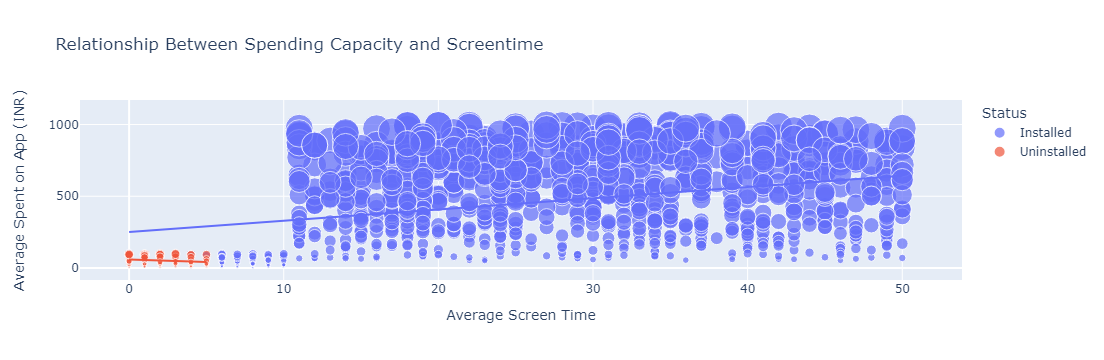

In [12]:
import plotly.express as px
figure = px.scatter(data_frame = data, 
                    x="Average Screen Time",
                    y="Average Spent on App (INR)", 
                    size="Average Spent on App (INR)", 
                    color= "Status",
                    title = "Relationship Between Spending Capacity and Screentime",
                    trendline="ols")
figure.show()

#### Q.5: Now check the relationship between the ratings given by users and the average screen time. Also explain your observation

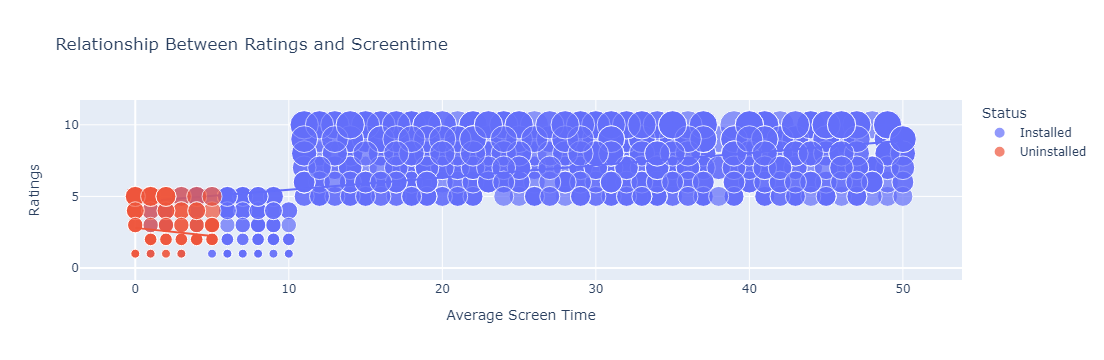

In [13]:
figure = px.scatter(data_frame = data, 
                    x="Average Screen Time",
                    y="Ratings", 
                    size="Ratings", 
                    color= "Status", 
                    title = "Relationship Between Ratings and Screentime",
                    trendline="ols")
figure.show()

####  Q.6: Now move forward to App User segmentation to find the users that the app retained and lost forever. You can use the K-means clustering algorithm in Machine Learning for this task.Also, tell the number of segments you have got.


In [30]:
clustering_data = data[["Average Screen Time", "Left Review", 
                        "Ratings", "Last Visited Minutes", 
                        "Average Spent on App (INR)", 
                        "New Password Request"]]

from sklearn.preprocessing import MinMaxScaler
for i in clustering_data.columns:
    MinMaxScaler(i)
    
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(clustering_data)
data["Segments"] = clusters

print(data.head(10))

   userid  Average Screen Time  Average Spent on App (INR)  Left Review  \
0    1001                 17.0                       634.0            1   
1    1002                  0.0                        54.0            0   
2    1003                 37.0                       207.0            0   
3    1004                 32.0                       445.0            1   
4    1005                 45.0                       427.0            1   
5    1006                 28.0                       599.0            0   
6    1007                 49.0                       887.0            1   
7    1008                  8.0                        31.0            0   
8    1009                 28.0                       741.0            1   
9    1010                 28.0                       524.0            1   

   Ratings  New Password Request  Last Visited Minutes       Status  Segments  
0        9                     7                  2990    Installed         0  
1        4    

In [31]:
print(data["Segments"].value_counts())

Segments
0    910
2     45
1     44
Name: count, dtype: int64


In [32]:
#rename the segments
data["Segments"] = data["Segments"].map({0: "Retained", 1: 
    "Churn", 2: "Needs Attention"})

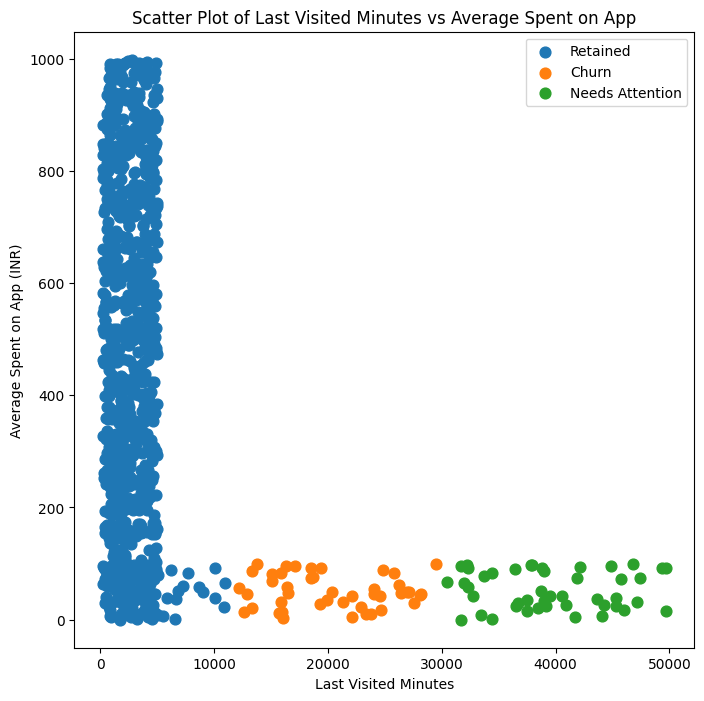

In [33]:
import matplotlib.pyplot as plt

# Create a new figure
plt.figure(figsize=(8, 8))
# Iterate over unique segments
for i in data["Segments"].unique():
    # Scatter plot for each segment
    plt.scatter(x=data[data["Segments"]==i]['Last Visited Minutes'],
                y=data[data["Segments"]==i]['Average Spent on App (INR)'],
                label=str(i),
                s=60)  # Adjust marker size as needed

# Set labels and title
plt.xlabel('Last Visited Minutes')
plt.ylabel('Average Spent on App (INR)')
plt.title('Scatter Plot of Last Visited Minutes vs Average Spent on App')

# Show legend
plt.legend()

# Show the plot
plt.show()
